## 1. 📊  ***Objetivo e Contexto***

**Este projeto busca entender os fatores que levam ao aumento da rotatividade (Turnover) na IBM, tendo em vista que o índice atual está em 16%. Nosso objetivo por meio dessa análise é identificar, analisar e propor uma solução que vise reduzir saídas, reter e desenvolver talentos.**

## 2. ⚙️ Configurações Iniciais e Importação de Bibliotecas

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Carregamento e limpeza dos dados.

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_raw = df.copy()


In [11]:
# Exibe a estrutura do DataFrame: colunas, tipos de dados, contagem de não-nulos e uso de memória.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 3. Limpeza e Pré-Processamento


In [13]:
# EmployeeCount: Coluna constante (todos os valores são iguais), não contribui com variabilidade para a análise.
# EmployeeNumber: Identificador único do funcionário, sem relação analítica direta com turnover.
# HourlyRate: Baixa variação e geralmente não reflete benefícios totais (como bônus), por isso tende a não se correlacionar com o churn.
# Over18: Todos os funcionários são maiores de 18 anos, tornando a coluna irrelevante para a análise.
# StandardHours: Todos os registros possuem o mesmo valor, logo não há utilidade analítica.
# PerformanceRating: Como mais de 80% dos funcionários têm a mesma avaliação (nota 3), a variável possui baixa variância e reduzido poder preditivo.

df[['EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours']].head(7)

,EmployeeCount,EmployeeNumber,HourlyRate,Over18,StandardHours
0,1,1,94,Y,80
1,1,2,61,Y,80
2,1,4,92,Y,80
3,1,5,56,Y,80
4,1,7,40,Y,80
5,1,8,79,Y,80
6,1,10,81,Y,80


In [14]:
# Remoção das mesmas colunas já citadas.

df.drop(['EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours', 'PerformanceRating'], axis=1, inplace=True)

In [15]:
pd.set_option('display.max_columns', None)
df.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
692,32,498,3,4,3,3,2,1,6725,13554,1,12,3,1,8,2,4,8,7,6,3
1286,40,616,2,2,3,3,1,1,3377,25605,4,17,4,1,7,5,2,4,3,0,2
1345,35,219,16,2,4,2,2,2,4788,25388,0,11,4,0,4,2,3,3,2,0,2
263,46,488,2,3,3,1,4,2,16872,14977,3,12,2,1,28,2,2,7,7,7,7
363,33,350,5,3,4,3,1,3,2851,9150,1,13,2,0,1,2,3,1,0,0,0


## 4. 🧠 Transformação de Variáveis Ordinais

In [16]:
# Conversão de variáveis ordinais com valores numéricos em categorias legíveis, melhorando a interpretação visual.

df['Education'] = df['Education'].replace({1:'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})
df['JobInvolvement'] = df['JobInvolvement'].replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
df['JobLevel'] = df['JobLevel'].replace({1:'Entry Level', 2: 'Junior Level', 3:'Mid Level', 4:'Senior Level', 5:'Executive'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})

## 5. 📊 Análise Exploratória Univariada

In [ ]:
# Esta etapa nos permite visualizar estatísticas descritivas, como valor mínimo, máximo, média e percentis das variáveis numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.5,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0


In [18]:
df['Attrition'].value_counts(normalize=False)

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [19]:
df['Attrition'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Attrition
No     83.88%
Yes    16.12%
Name: proportion, dtype: object

In [20]:
# Listagem das variáveis por tipo, para facilitar a análise.

print("Object-type columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"  - {col}")

print("\nNumerical-type columns:")
for col in df.select_dtypes(include='number').columns:
    print(f"  - {col}")

Object-type columns:
  - Attrition
  - BusinessTravel
  - Department
  - Education
  - EducationField
  - EnvironmentSatisfaction
  - Gender
  - JobInvolvement
  - JobLevel
  - JobRole
  - JobSatisfaction
  - MaritalStatus
  - OverTime
  - RelationshipSatisfaction
  - WorkLifeBalance

Numerical-type columns:
  - Age
  - DailyRate
  - DistanceFromHome
  - MonthlyIncome
  - MonthlyRate
  - NumCompaniesWorked
  - PercentSalaryHike
  - StockOptionLevel
  - TotalWorkingYears
  - TrainingTimesLastYear
  - YearsAtCompany
  - YearsInCurrentRole
  - YearsSinceLastPromotion
  - YearsWithCurrManager


### 5.1 🔍 Análise de Variáveis Categóricas

In [21]:
# Análise univariada do churn por categorias (variáveis do tipo object)
# Bins = faixas numéricas


obj_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Attrition']


max_attr = {}

for col in obj_cols:
    ct = pd.crosstab(df[col], df['Attrition'], normalize='index')
    if 'Yes' in ct.columns:
        max_attr[col] = (ct['Yes'] * 100).max()
    else:
        max_attr[col] = 0.0

max_attr_series = pd.Series(max_attr).sort_values(ascending=False)

print("Highest % of 'Yes' Attrition by categorical column:")
print(max_attr_series.round(1))

Highest % of 'Yes' Attrition by categorical column:
JobRole                     39.8
JobInvolvement              33.7
WorkLifeBalance             31.2
OverTime                    30.5
JobLevel                    26.3
EducationField              25.9
MaritalStatus               25.5
EnvironmentSatisfaction     25.4
BusinessTravel              24.9
JobSatisfaction             22.8
RelationshipSatisfaction    20.7
Department                  20.6
Education                   18.2
Gender                      17.0
dtype: float64


In [22]:
def plot_high_attrition_cols(df, multiplier=1.6):
    thr = df.Attrition.eq('Yes').mean() * 100 * multiplier
    for col in df.select_dtypes('object').drop('Attrition', axis=1):
        max_pct = df.groupby(col).Attrition.apply(lambda s: s.eq('Yes').mean() * 100).max()
        if max_pct < thr:
            continue

        tot = df[col].value_counts().sort_index()
        yes = (df.loc[df.Attrition.eq('Yes'), col].value_counts().reindex(index=tot.index, fill_value=0))
        pct = (yes / tot * 100).round(1)
        data = pd.DataFrame({'Total': tot, 'Quit': yes, '% Quit': pct})

        ax = data[['Total','Quit']].plot(kind='barh',color=['#0072B2', '#E69F00'],edgecolor='black',figsize=(6, len(data) * 0.4 + 1))
        
        for i, (t, y, p) in enumerate(zip(data['Total'], data['Quit'], data['% Quit'])):
            ax.text(t + 1, i - 0.2, f'{int(t)}', va='center', fontsize=9)
            ax.text(y + 3, i + 0.2, f'{int(y)} ({p}%)', va='center', fontsize=9)

        ax.set_title(col, fontsize=12)
        ax.set_xlabel('Employees')
        ax.set_ylabel(col)
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        ax.legend(loc='upper right', frameon=False)
        plt.tight_layout()
        plt.show()

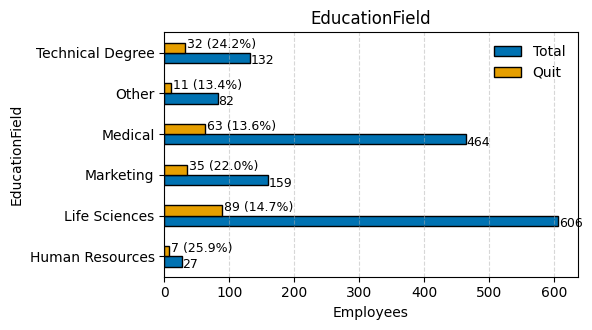

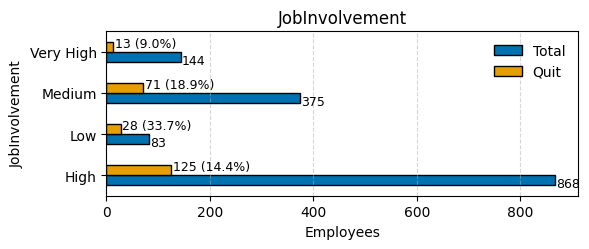

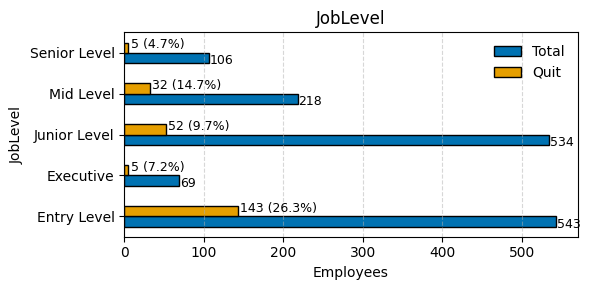

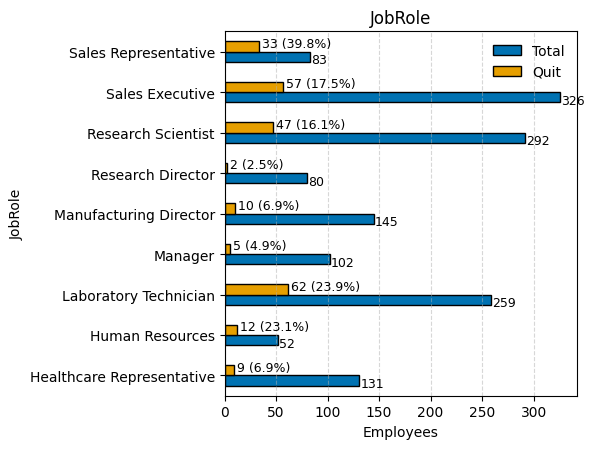

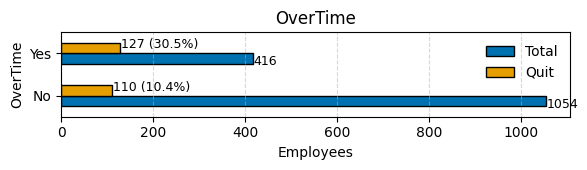

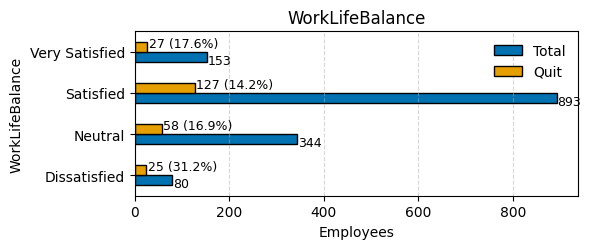

In [23]:
# EducationField: Pessoas com formação em Marketing talvez estejam menos alinhadas às oportunidades da empresa ou tenham alta demanda externa do mercado, apresentando saída de 22%.
# EducationField: Já em Human Resources, 25% dos colaboradores saem... possível indício de problemas de cultura ou reconhecimento, pois são justamente os responsáveis pela retenção de pessoas da empresa.
# *Ação*: Aplicar programa de feedback contínuo para mapear "dores" dos colaboradores e verificar se os profissionais de RH estão sobrecarregados ou desmotivados.

# JobInvolvement: Funcionários com baixo envolvimento têm 33% de saída, o dobro de qualquer outro grupo. Baixo envolvimento indica falta de propósito, alinhamento ou reconhecimento.
# *Ação*: Realizar pesquisas de engajamento e entrevistas de saída. Implementar programas de feedback contínuo e reconhecimento.

# JobLevel: Colaboradores em Entry Level têm 26% de saída; possivelmente por insegurança, menor salário e maior propensão a buscar outras oportunidades.
# *Ação*: Criar um plano de desenvolvimento acelerado para novos talentos, reforçando a cultura de acolhimento e treinamento nos primeiros 6 - 12 meses.

# JobRole: Sales Representatives apresentam churn de 39%, quase o dobro de qualquer outro cargo. Áreas comerciais costumam ter metas agressivas e alta pressão.
# JobRole: Remuneração variável baixa, falta de suporte ou burnout podem ser causas adicionais.
# *Ação*: Revisar a política de metas e comissões, criar mentorias para vendedores novatos e reavaliar a gestão da área.

# Overtime: Funcionários que fazem horas extras regularmente têm saída de 30%, contra apenas 10% de quem não faz. Forte indicativo de desequilíbrio vida pessoal/trabalho ou má gestão de recursos.
# *Ação*: Monitorar o banco de horas por setor e negociar dias de folga conforme preferência dos funcionários, recompensando-os pelas horas extras e melhorando a satisfação e o moral.

# WorkLifeBalance: Nota-se que colaboradores "Dissatisfied" têm 31% de churn, e os "Neutral", 16%, ambos acima da média. Confirma a hipótese de que qualidade de vida impacta diretamente na permanência.
# *Ação*: Criar programas de bem-estar, horários flexíveis, apoio psicológico e momentos de descompressão.

plot_high_attrition_cols(df, multiplier=1.6)

### 5.2 🧮 Análise de Variáveis Numéricas

In [24]:
# Análise univariada das variáveis numéricas, agrupadas em faixas (bins), para encontrar onde há maior incidência de churn. 
# Bins = faixas numéricas

max_num_attr = {}

for col in df.select_dtypes(include='number').columns:
    bins = pd.qcut(df[col], 4, duplicates='drop')
    ct = pd.crosstab(bins, df['Attrition'], normalize='index')
    max_num_attr[col] = ct.get('Yes', 0).max() * 100

max_num_series = pd.Series(max_num_attr).sort_values(ascending=False)

print("Highest % of Attrition='Yes' by int64 column:")
print(max_num_series.round(1))

Highest % of Attrition='Yes' by int64 column:
MonthlyIncome              29.3
YearsAtCompany             26.0
Age                        25.9
TotalWorkingYears          25.6
YearsInCurrentRole         22.6
NumCompaniesWorked         21.8
YearsWithCurrManager       21.4
DistanceFromHome           20.6
DailyRate                  20.1
TrainingTimesLastYear      18.2
PercentSalaryHike          18.1
MonthlyRate                17.9
StockOptionLevel           17.1
YearsSinceLastPromotion    17.1
dtype: float64


In [25]:
# Função para visualizar o churn (Attrition = 'Yes') por faixas (bins) de uma variável numérica.
# Ela agrupa os dados em intervalos com base em quantis e calcula a taxa de saída em cada um.
# A faixa com maior churn é destacada visualmente para facilitar a identificação de zonas críticas.
# Útil para identificar padrões escondidos em variáveis como idade, renda, anos na empresa etc.


def plot_churn_by_bin(df, col, bins=5,highlight_color='#D55E00',bar_color='#009E73'):
    
    df[f"{col}_bin"] = pd.qcut(df[col], q=bins, duplicates='drop')
    churn_rate = (df.groupby(f"{col}_bin")['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).round(1))

    colors = [bar_color] * len(churn_rate)
    max_idx = churn_rate.idxmax()
    colors[list(churn_rate.index).index(max_idx)] = highlight_color

    ax = churn_rate.plot.barh(color=colors,edgecolor='black',figsize=(6, len(churn_rate)*0.4 + 1))
    
    ax.set_xlabel('% Attrition = Yes')
    ax.set_title(f'Churn by {col} bin')
    ax.set_yticklabels([f"{int(i.left):,}–{int(i.right):,}" for i in churn_rate.index])

    for i, rate in enumerate(churn_rate):
        ax.text(rate + 0.5, i, f'{rate}%', va='center')

    plt.tight_layout()
    plt.show()

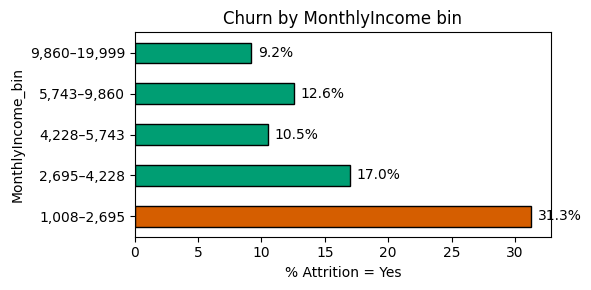

In [26]:
# Funcionários com renda mensal abaixo de R$ 2.695 apresentam a maior taxa de Churn 31%. 
# Isso indica que salários baixos estão diretamente relacionados à saída voluntária e talvez até a busca por outras oportunidades externas.

# *Ação* : Revisar faixas salariais para posições iniciais ou operacionais. Oferecer incentivos não financeiros, por exemplo: benefícios, reconhecimento, bônus por performance e também a transparência com plano de carreira.
plot_churn_by_bin(df, 'MonthlyIncome', bins=5)


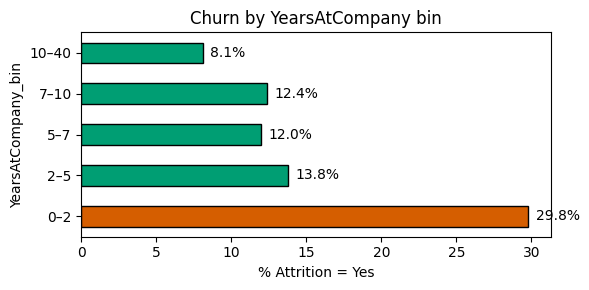

In [27]:
# Novos colaboradores com até 2 anos de empresa tem Churn de 29,8%, oque indica um possível problema com onboarding, integração ou até expectativas frustradas. 

# *Ação* : Fortalecer o onboarding, propor treinamento para líderes e melhorar integração nas primeiras semanas. Alinhar expectativas desde o recrutamento, evitando frustrações 
plot_churn_by_bin(df, 'YearsAtCompany', bins=5)

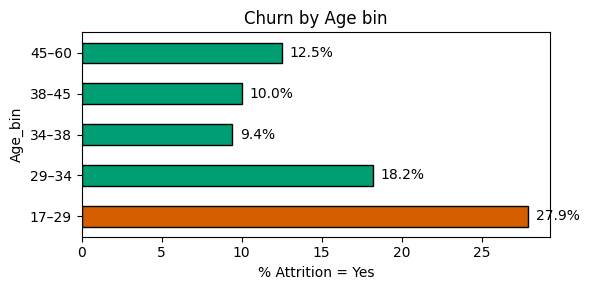

In [28]:
# Jovens no início de carreira tendem a mudar mais de emprego em busca de crescimento profissional, remuneração, cultura etc... 

# *Ação* : Desenvolver programas de retenção para jovens talentos, como planos de carreira acelerados, reforçando o que já foi sugerido na análise de "JobLevel".
plot_churn_by_bin(df, 'Age', bins=5)


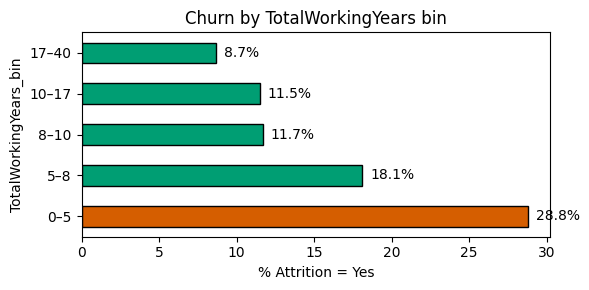

In [29]:
# Profissionais com até 05 anos de experiência tem um taxa de Churn de 28%, indicando maior rotatividade entre profissionais mais jovens ou recém inseridos no mercado.

# *Ação* : Reforçar acompanhamento e desenvolvimento no início de carreira, garantir alinhamento de expectativas e oferecer crescimento estruturado.
plot_churn_by_bin(df, 'TotalWorkingYears', bins=5)

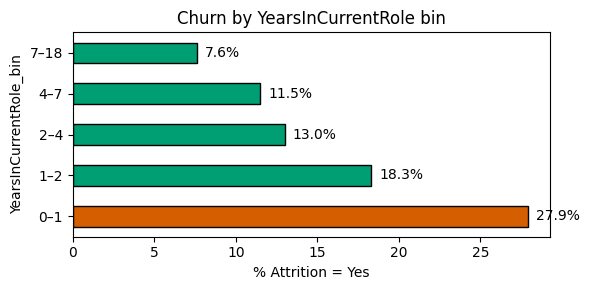

In [30]:
# Alta rotatividade para funcionários em posições recém assumidas, indicando falta de adaptação ao novo cargo, promoção mal planejada ou ajustes mal comunicados, taxa de Churn 27,9%.

# *Ação* : Garantir que a mudanças de cargo venham acompanhadas de treinamento, onboarding interno e acompanhamento do gestor, aplicar feedback estruturado nos primeiros meses após a promoção.
plot_churn_by_bin(df, 'YearsInCurrentRole', bins=5)


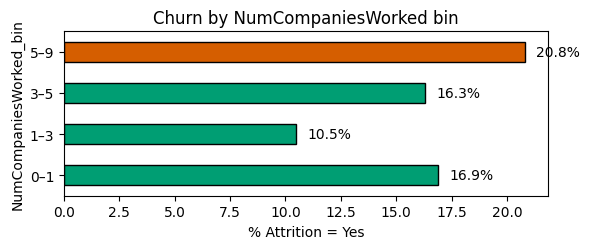

In [31]:
# Colaborador com histórico de mudanças de 5 a 9 empresas, tendem a gerar um Churn de 20,8%.
# Isso pode indicar um perfil com baixa ou pouca permanência em algumas empresas, também pode refletir baixa fidelização da empresa em reter talentos com ampla experiência.

# *Ação* : Durante o recrutamento, avaliar melhor o perfil de profissionais com histórico extenso de empresas, explorar motivos das saídas anteriores em entrevistas.
plot_churn_by_bin(df, 'NumCompaniesWorked', bins=5)


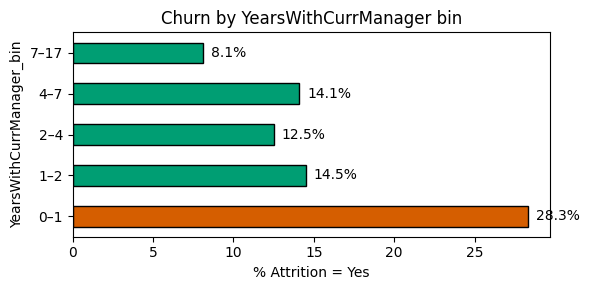

In [32]:
# A troca recente de liderança pode gerar desalinhamento, insegurança ou quebra de confiança. Isso reforça a importância da relação direta de gestor e colaborador, após 1 ano o Churn cai para a faixa de 14%, metade!

# Investir em integração entre líderes e novas equipes, aplicar follow-up nos 3 primeiros meses após a mudança de gestão. Oferecer treinamento de liderança empática para novos gestores e feedback (1:1), Gestor e colaborador.
plot_churn_by_bin(df, 'YearsWithCurrManager', bins=5)


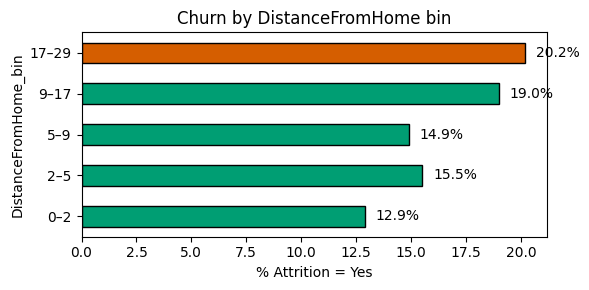

In [33]:
# A distância até o trabalho pode estar diretamente relacionada ao cansaço e à insatisfação com o deslocamento, além de indiretamente amplificar os efeitos de práticas como o Overtime... 
# o que aumenta o tempo fora de casa e prejudica o equilíbrio entre vida pessoal e profissional.

# *Ação* : Avaliar modelos de trabalho híbrido ou remoto para colaboradores que moram mais longe. Oferecer ajuda de custo com transporte ou flexibilização de horários para evitar picos de trânsito.
plot_churn_by_bin(df, 'DistanceFromHome', bins=5)


## 6. ⚙️ Pré-Processamento para Modelagem Preditiva


In [34]:
# Pré-processamento para modelagem preditiva. A variável alvo (Attrition) é convertida para formato binário, e as variáveis independentes (X) são divididas entre numéricas e categóricas.
# As categóricas são transformadas em dummies (one-hot encoding), e a base resultante será usada para treinar modelos de classificação.

y = df.Attrition.map({'No':0,'Yes':1})

num_cols = [
    'Age','DailyRate','DistanceFromHome','MonthlyIncome','MonthlyRate',
    'NumCompaniesWorked','PercentSalaryHike','StockOptionLevel',
    'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
    'Education','EnvironmentSatisfaction','JobInvolvement',
    'JobLevel','JobSatisfaction','RelationshipSatisfaction',
    'WorkLifeBalance']

cat_cols = ['OverTime','MaritalStatus','BusinessTravel','JobRole','EducationField']

X = pd.concat([df_raw[num_cols],pd.get_dummies(df[cat_cols], drop_first=True)], axis=1)

## 7. 📏 Correlação entre Variáveis e Attrition


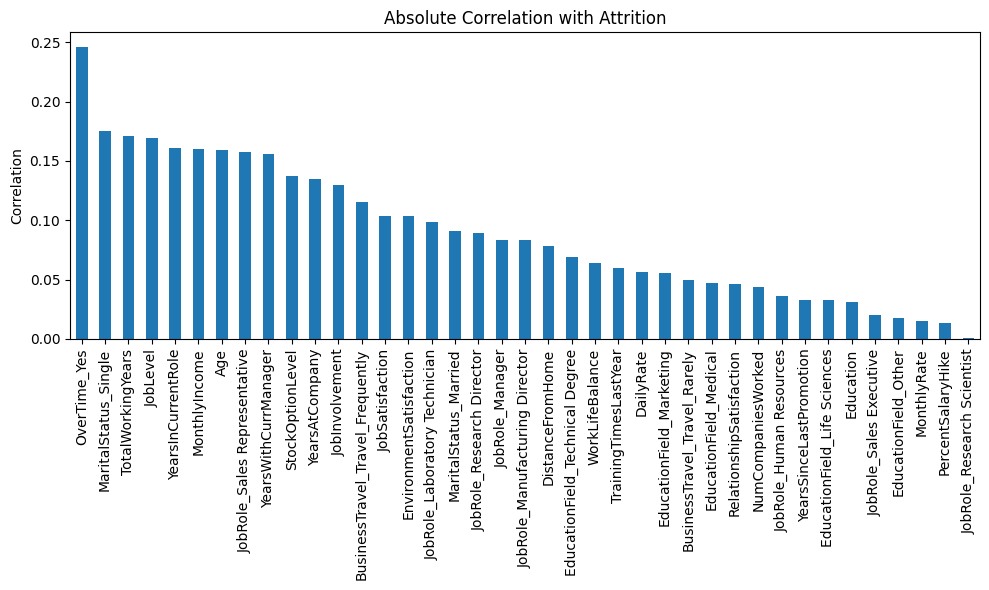

In [35]:
# Cálculo da correlação absoluta entre cada feature e Attrition, útil para priorizar variáveis na modelagem preditiva.

corr = X.corrwith(y).abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
corr.plot.bar()
plt.title('Absolute Correlation with Attrition')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

## 8. 🌳 Modelagem Preditiva - Árvore de Decisão



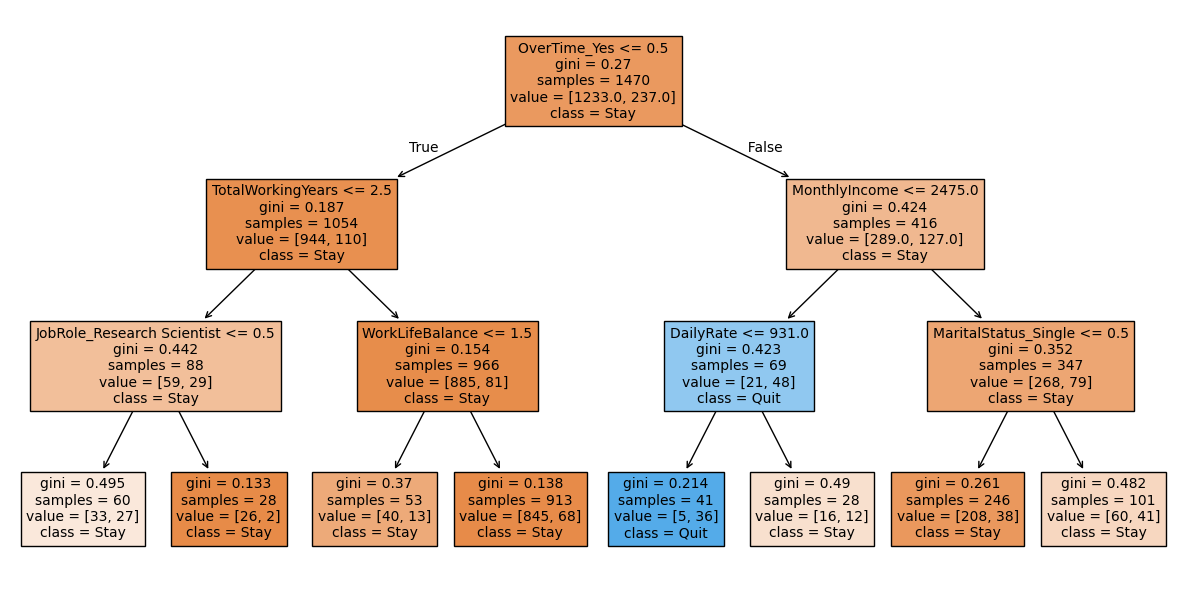

In [36]:
# A análise mostra que funcionários que fazem hora extra, têm pouca experiência e recebem salários mais baixos estão significativamente mais propensos a pedirem demissão.

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(tree,feature_names=X.columns,class_names=['Stay','Quit'],filled=True,fontsize=10)
plt.tight_layout()
plt.show()

## 9. 📊 Churn por Tempo de Empresa × Tempo Desde Última Promoção

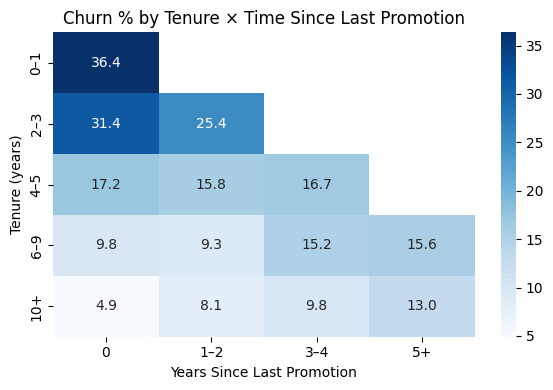

In [37]:
# Heatmap da taxa de churn (%), combinando o tempo de empresa e anos desde a última promoção.

# *Ação* : Criar estratégias de retenção para funcionários com pouco tempo de casa, e, que não tiverem promoção com menos de 03 anos. Avaliar planos de desenvolvimento de carreira.

df_heat = df.copy()

prom_bins   = [0, 1, 3, 5, 40]
prom_labels = ['0', '1–2', '3–4', '5+']
df_heat['PromBin'] = pd.cut(df_heat['YearsSinceLastPromotion'],bins=prom_bins,labels=prom_labels,right=False)

yac_bins   = [0, 1, 3, 5, 10, 40]
yac_labels = ['0–1', '2–3', '4–5', '6–9', '10+']
df_heat['TenureBin'] = pd.cut(df_heat['YearsAtCompany'],bins=yac_bins,labels=yac_labels,right=False)

heat2 = (df_heat.groupby(['TenureBin','PromBin'])['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).unstack())

plt.figure(figsize=(6,4))
sns.heatmap(heat2, annot=True, fmt='.1f', cmap='Blues')
plt.title('Churn % by Tenure × Time Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Tenure (years)')
plt.tight_layout()
plt.show()

## 9.1 📊 Churn por Tempo de Empresa × Tempo Desde Última Promoção


In [38]:
# Descrição númerica de Total x Quit.

total = (df_heat.groupby(['TenureBin','PromBin'])['Attrition'].count().unstack())

quit_counts = (df_heat.groupby(['TenureBin','PromBin'])['Attrition'].apply(lambda s: (s == 'Yes').sum()).unstack())

print("Total employees by TenureBin and PromBin:\n", total)
print("\nEmployees who quit by TenureBin and PromBin:\n", quit_counts)

Total employees by TenureBin and PromBin:
 PromBin      0  1–2  3–4   5+
TenureBin                    
0–1         44    0    0    0
2–3        172  126    0    0
4–5         99  133    6    0
6–9        205  183   46   90
10+         61   74   61  169

Employees who quit by TenureBin and PromBin:
 PromBin       0   1–2  3–4    5+
TenureBin                       
0–1        16.0   NaN  NaN   NaN
2–3        54.0  32.0  NaN   NaN
4–5        17.0  21.0  1.0   NaN
6–9        20.0  17.0  7.0  14.0
10+         3.0   6.0  6.0  22.0


## 10. Churn por Faixa Etária × OverTime


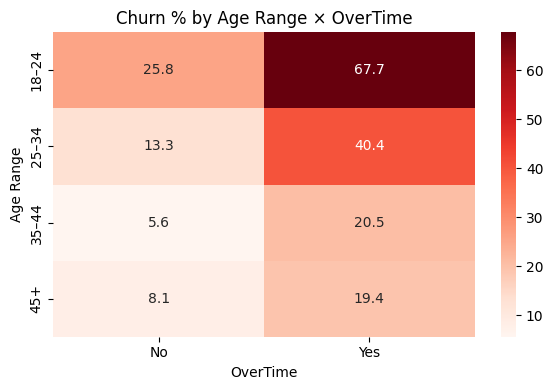

In [39]:
# Jovens entre 18-24 anos que fazem hora extra tem a maior taxa de Churn, 67%. Esse número decaí nas próximas categorias de faixa-etária, tanto para os que fazem hora extra ou não. 

# *Ação* : Evitar alocar hora extra em colaboradores muito jovens, buscar grupos de jovens que se voluntariem a fazer hora extra por desejo próprio, buscando mitigar a insatisfação ou desgaste físico e mental.

df_heat = df.copy()

age_bins   = [18, 25, 35, 45, 61]
age_labels = ['18–24', '25–34', '35–44', '45+']
df_heat['AgeBin'] = pd.cut(df_heat['Age'],bins=age_bins,labels=age_labels,right=False)

heat1 = (df_heat.groupby(['AgeBin','OverTime'])['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).unstack())

plt.figure(figsize=(6,4))
sns.heatmap(heat1, annot=True, fmt='.1f', cmap='Reds')
plt.title('Churn % by Age Range × OverTime')
plt.xlabel('OverTime')
plt.ylabel('Age Range')
plt.tight_layout()
plt.show()


## 11. Churn por Departamento

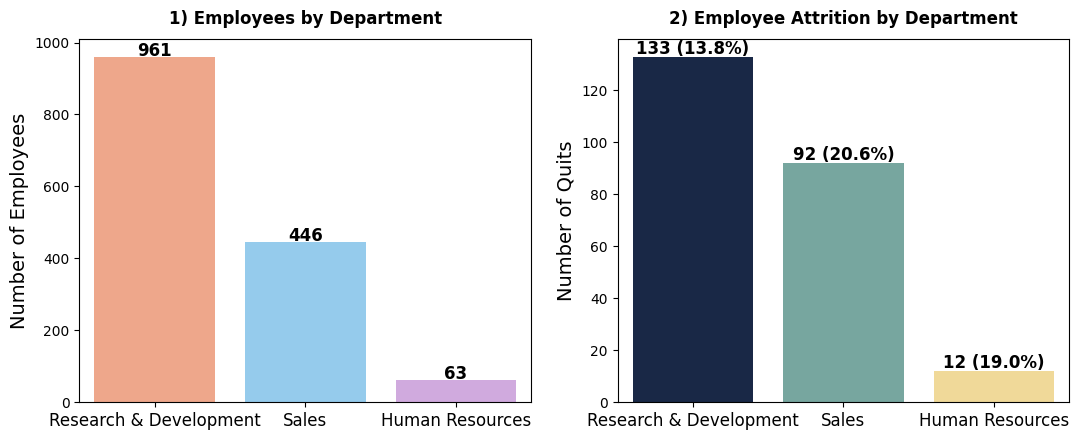

In [40]:
# A área de Sales e RH tem as maiores taxas de Churn, 20% e 19%, apesar de terem menos funcionários. Já R&D, tem o maior número de saídas porém, com a grande quantidade funcionários torna essa taxa menor, de 13%.

# *Ação* : Focar em retenção direcionada por área pois pode haver grande cobrança por metas e objetivos "inatingíveis", investigar causas em Sales e RH, e, reforçar ações de engajamento em R&D, mesmo com churn proporcional mais baixo.

tot_dept  = df["Department"].value_counts()
quit_dept = df[df["Attrition"] == "Yes"]["Department"].value_counts()
pct_dept  = (quit_dept / tot_dept * 100).round(1)

pal_total = ["#FFA07A", "#87CEFA", "#D4A1E7"]
pal_quit  = ["#11264e", "#6faea4", "#FEE08B"] 

plt.figure(figsize=(11,4.5))

plt.subplot(1,2,1)
sns.barplot(x=tot_dept.index,y=tot_dept.values,palette=pal_total[:len(tot_dept)])
plt.title("1) Employees by Department", fontsize=12, fontweight="bold", pad=11)
plt.ylabel("Number of Employees", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=0, fontsize=12)
for i, v in enumerate(tot_dept.values):
    plt.text(i, v + -9, f"{v}", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.subplot(1,2,2)
sns.barplot(x=quit_dept.index,y=quit_dept.values,palette=pal_quit[:len(quit_dept)])
plt.title("2) Employee Attrition by Department", fontsize=12, fontweight="bold", pad=11)
plt.ylabel("Number of Quits", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=0, fontsize=12)
for i, v in enumerate(quit_dept.values):
    pct = pct_dept[quit_dept.index[i]]
    plt.text(i, v + -0.5, f"{v} ({pct}%)", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


## 11.1 🕒 Churn por Departamento × OverTime


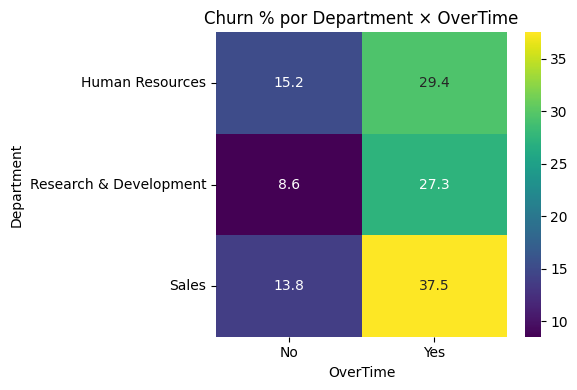

In [41]:
# Anteriormente vimos que o Churn é claramente mais alto departamentos como Sales e RH. 
# Quando cruzamos os dados com "Overtime", constatamos que pode estar ocorrendo um grande desgaste dessas áreas com relação as horas extras, já que Sales (37,5%) e RH (29,4%) de saídas.

# *Ação* : Além das medidas já sugeridas com relação a compensações, (folgas, bônus, flexibilidade com relação ao horário),é importante verificar a possibilidade de reduzir as horas extras.

dept_ot = (df.groupby(['Department','OverTime'])['Attrition'].apply(lambda s: (s=='Yes').mean()*100).unstack())

plt.figure(figsize=(6,4))
sns.heatmap(dept_ot, annot=True, fmt='.1f', cmap='viridis')
plt.title('Churn % por Department × OverTime')
plt.xlabel('OverTime')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


## 12. 🧳 Churn por Business Travel × Job Level


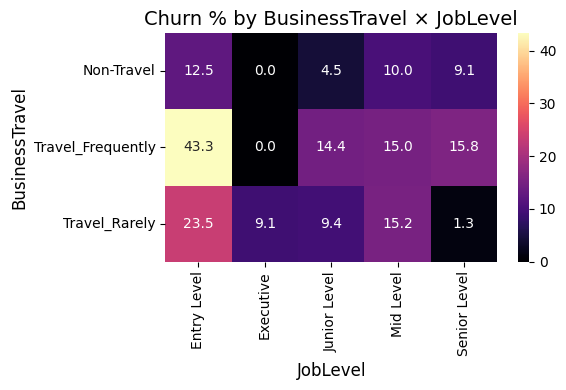

In [42]:
# Funcionários com menor cargo e alta exigência de viagem demonstram um Churn de 43%, em níveis mais altos, o Churn se mantém baixo, independente da frequência de viagem.

# Reduzir a exigência de viagens para funcionários iniciantes, ou, oferecer suporte diferenciado... por exemplo, maior flexibilidade, ajuda de custo, adaptação.
bt_jl = (df.groupby(['BusinessTravel', 'JobLevel'])['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).unstack())

plt.figure(figsize=(6, 4))
sns.heatmap(bt_jl, annot=True, fmt='.1f', cmap='magma')
plt.title('Churn % by BusinessTravel × JobLevel', fontsize=14)
plt.xlabel('JobLevel', fontsize=12)
plt.ylabel('BusinessTravel', fontsize=12)
plt.tight_layout()
plt.show()

In [43]:
df.to_csv("ibm_hr_clean.csv", index=False)

## 13. 🧩 **Problema Proposto:**

A empresa tem uma taxa de rotatividade de 16%, o que afeta diretamente seus custos com desligamento, recrutamento e treinamento. O objetivo é entender os fatores que estão associados ao desligamento voluntário de funcionários, com o objetivo  de desenvolver ações que venham mitigar o Turnover e aumentem a retenção de talentos.

## 14 🧪 Soluções Exploradas

* ✅ Limpeza e pré-processamento dos dados
* ✅ Análise exploratória com segmentações por idade, tempo de casa, cargo, horas extras, satisfação e viagens a trabalho.
* ✅ Visualizações estratégicas com gráficos e heatmaps
* ✅ Transformações de variáveis categóricas e ordinais para facilitar a leitura e interpretação dos dados
* ✅ Modelagem preditiva com árvore de decisão para entender os principais fatores de churn e prever possíveis saídas futuras.



## 15. 📊 Resultados Encontrados

* Overtime é o maior fator de risco de saída, funcionários que fazem hora extra tem 3x mais propensão a sair.
* Funcionários jovens de 18-24 anos, e com pouco tempo de empresa (menos de 2 anos), tem maior chance ao Churn.
* Sales Representatives e área como Recursos Humanos apresentam Churn acima de 35%
* Cargo de entrada (Entry Level) por exemplo, tem maior rotatividade, sugerindo falha de onboarding ou expectativas frustradas.
* Salários abaixo de U$ 2.700 também são fortes indicadores de saídas, tendo um Churn acima de 30%

## 16. 📌 Ações Estratégicas Recomendadas

1.  Reduzir e monitorar horas extras, principalmente entre os jovens e cargos iniciais.
2.  Fortalecer o onboarding e programas de acolhimento nos 6 primeiros meses, principalmente para pessoas que tem pouco tempo de empresa num geral, justificando talvez uma expectativa pouco atingida nos primeiros anos de carreira.
3.  Criar planos de desenvolvimento acelerado, para (Entry Levels e Sales).
4.  Melhorar o equilíbrio de vida pessoal x trabalho, com iniciativas de saúde mental, flexibilização de horário, escala e feedback contínuo.
5.  Avaliar histórico de trocas de emprego e liderança no recrutamento, oferecendo suporte para perfis de alta rotatividade.
6.  Reavaliar as faixas salariais iniciais ou mais baixas, oferecendo incentivos não financeiros e plano de carreira claro.